#EDA and Prediction

In [ ]:
import numpy as np #linear algoritma
import pandas as pd #datapreprocessing, CSV file I/O (e.g..pd.read_csv)
import seaborn as sns #for creating plots
import matplotlib.ticker as mtick #for specifiying the axes tick format
import matplotlib.pyplot as plt

sns.set(style="white")

#input data files are available in the ".../input/" directory.

#Any results you write to the current directory are saved as output

In [ ]:
!pwd

/content


In [ ]:
# Mengimpor pustaka yang diperlukan
import pandas as pd
from google.colab import drive

# Menghubungkan Google Drive
drive.mount('/content/drive', force_remount=True)

# Membaca file CSV
file = '/content/drive/MyDrive/GoogleColab/ds_project4_customer_churn_data.csv'
telecom_cust = pd.read_csv(file)

# Menampilkan beberapa baris pertama dari dataset
telecom_cust.head()

Mounted at /content/drive


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
telecom_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
telecom_cust.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
telecom_cust.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [ ]:
#Checking the data types of all the column
telecom_cust.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [ ]:
#converting Total Charges to a numerical data type
telecom_cust.TotalCharges = pd.to_numeric(telecom_cust.TotalCharges, errors='coerce')
telecom_cust.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
#Removing missing values
telecom_cust.dropna(inplace=True)
#Remove customer IDs from the data set
df2= telecom_cust.iloc[:,1:]
#Converting the predictor variable in a binary numeric variable
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No',  value=0, inplace=True)

#Let's convert all the categorical variable into One Hot Encoding variable
df_dummies = pd.get_dummies(df2, drop_first=True) #If drop_first is not true, it may impact to the one hot encoding trap
df_dummies.head()

<ipython-input-100-9fbfc7cff930>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
<ipython-input-100-9fbfc7cff930>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


<Axes: >

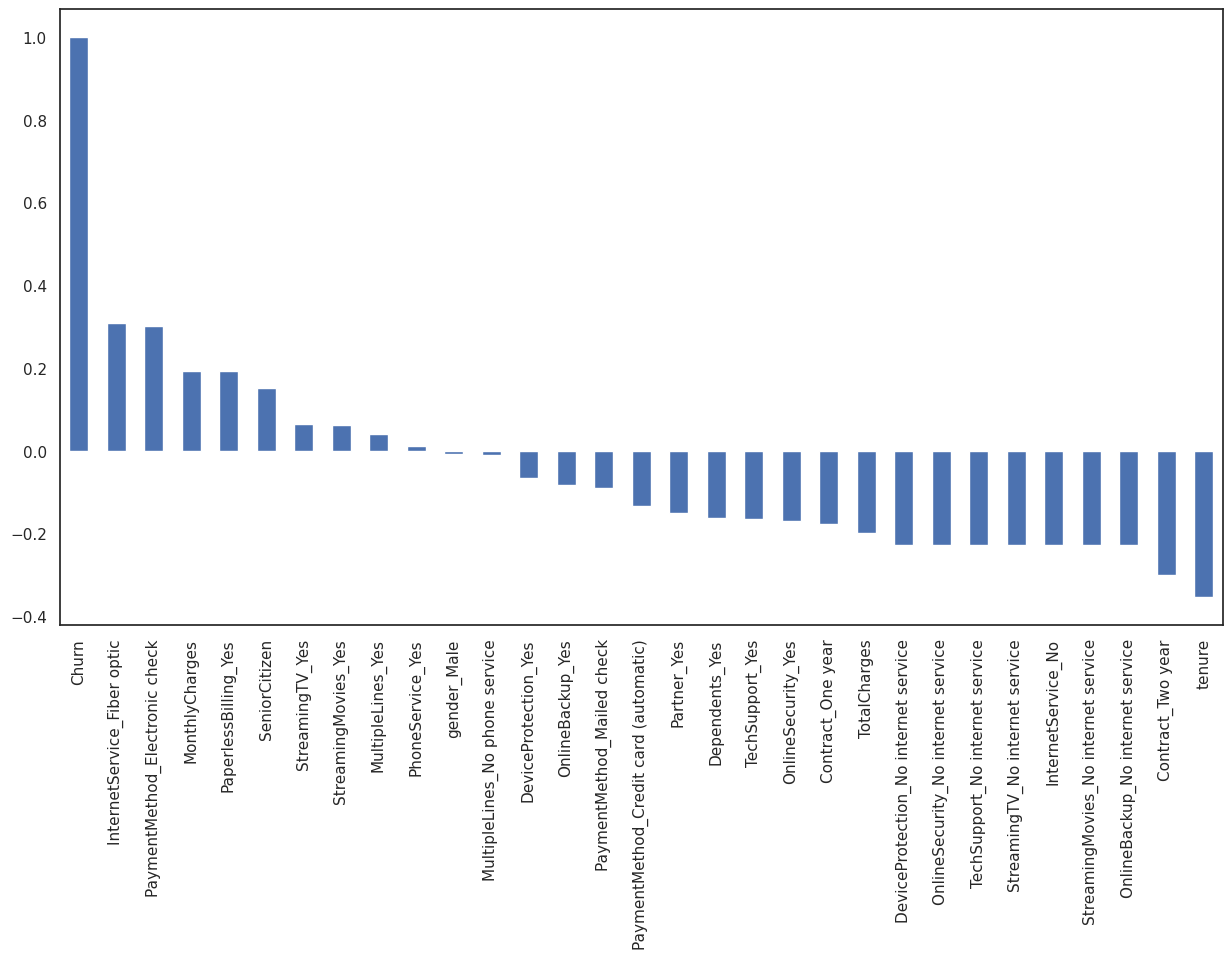

In [ ]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(15,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

month to month contracts, absence of online security and tech support seem to be positively correlated with churn. While tenure two year contracts seem to be negatively correlated with churn.

Interestingly, services such as Online security, streaming TV, online backup, tech support, etc. without internet connection seem to be negatively related to churn.

We will explore the patterns for the correlations bellow before we delvo into modelling and identifiying the important variables.

#Data Exploration

Let us first start with exploring our data set to better understand the patterns in the data and potentialy form some hypothesis. First we will look at the distrubution of individual variables and then slice and dice our data for any interesting trends.

**A.)Demographics** - Let us first understand the gender, age range, patner and dependent status of customers
**1. Gender Distribution** - About half of the customers in our data set are male while the other half are female

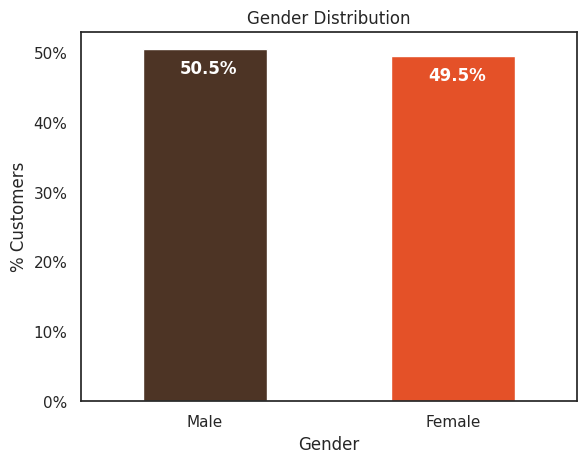

In [ ]:
colors = ['#4D3425', '#E45128']
ax = (telecom_cust['gender'].value_counts()*100.0 /len(telecom_cust)).plot(kind='bar',
                                                                           stacked=True,
                                                                           rot=0,
                                                                           color=colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
ax.set_ylabel('% Customers')
ax.set_title('Gender Distribution')

#Create a list to collect the plt.patches data
totals = []

#Find the values and append to list
for i in ax.patches:
  totals.append(i.get_width())

#set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
  #get_width pulls left or right; get_y pushes up or down
  ax.text(i.get_x()+.15, i.get_height()-3.5, \
          str(round((i.get_height()/total),1))+'%',
          fontsize=12,
          color='white',
          weight='bold')

**2.Senior Citizen** - There are only 16% the customers who are senior citizens. Thus most of our customers in the data are youger people.

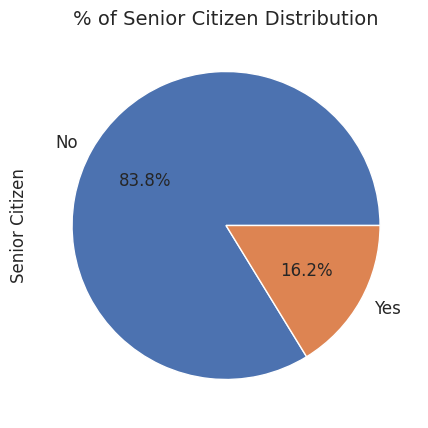

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Menghitung persentase Senior Citizen
senior_citizen_distribution = telecom_cust['SeniorCitizen'].value_counts() * 100.0 / len(telecom_cust)

# Membuat pie chart
ax = senior_citizen_distribution.plot.pie(autopct='%.1f%%', labels=['No', 'Yes'], figsize=(5, 5), fontsize=12)

# Mengatur format sumbu y
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Menambahkan label sumbu y
ax.set_ylabel('Senior Citizen', fontsize=12)

# Mengoreksi kesalahan penulisan 'set_tittle' menjadi 'set_title'
ax.set_title('% of Senior Citizen Distribution', fontsize=14)

# Menampilkan plot
plt.show()

**3. Partner and Dependent Status** - About 50% of the customers have a partner, while only 30% of the total customers have dependents.

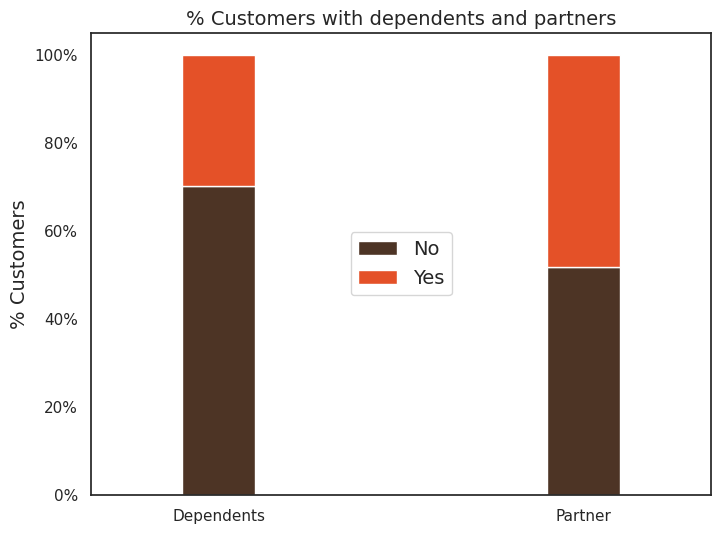

In [ ]:
df2 = pd.melt(telecom_cust, id_vars=['customerID'], value_vars=['Dependents', 'Partner'])
df3 = df2.groupby(['variable', 'value']).count().unstack()
df3 = df3*100/len(telecom_cust)
colors = ['#4D3425', '#E45128']
ax = df3.loc[:,'customerID'].plot.bar(stacked=True, color=colors,
                                      figsize=(8, 6), rot=0,
                                      width = 0.2)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers', size=14)
ax.set_xlabel('')
ax.set_title('% Customers with dependents and partners', size=14)
ax.legend(loc='center', prop = {'size':14})

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+25*width, p.get_y()+.4*height),
                color = 'white',
                weight = 'bold',
                size = 14)

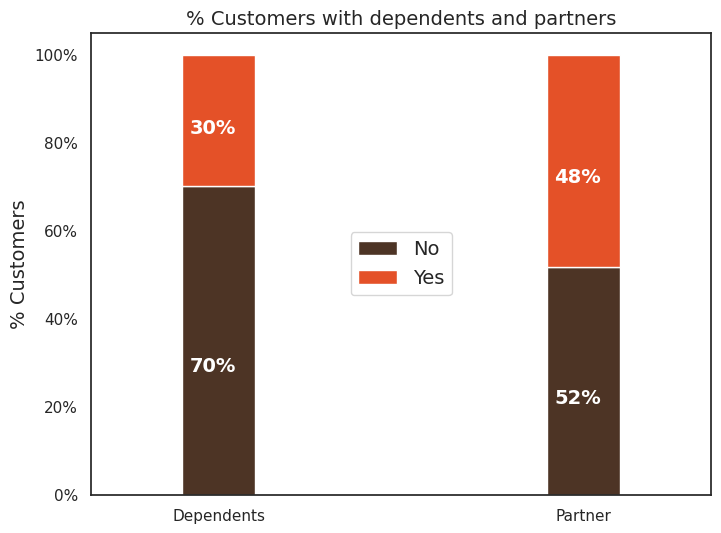

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Mengubah data menjadi format long
df2 = pd.melt(telecom_cust, id_vars=['customerID'], value_vars=['Dependents', 'Partner'])

# Mengelompokkan dan menghitung persentase
df3 = df2.groupby(['variable', 'value']).count().unstack()
df3 = df3 * 100 / len(telecom_cust)

# Menggunakan kode warna yang valid
colors = ['#4D3425', '#E45128']  # Pastikan kode warna hex memiliki 6 karakter

# Membuat bar plot
ax = df3.loc[:, 'customerID'].plot.bar(stacked=True, color=colors,
                                        figsize=(8, 6), rot=0,
                                        width=0.2)

# Mengatur format sumbu y
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Menambahkan label dan judul
ax.set_ylabel('% Customers', size=14)
ax.set_xlabel('')
ax.set_title('% Customers with dependents and partners', size=14)
ax.legend(loc='center', prop={'size': 14})

# Menambahkan anotasi persentase pada setiap bar
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x() + 0.1 * width, p.get_y() + 0.4 * height),
                color='white',
                weight='bold',
                size=14)

# Menampilkan plot
plt.show()

*What would be interesting is to look at the % of customers, who have partners also have dependets. We will explore this next*

Interestingly, among the customers who have a partner, only about half of them have a dependent, while other half do not have any independents. Additionaly, as expected, among the customers who do not have any partner, a majority(80%) of them do not have any dependents.

In [ ]:
telecom_cust.groupby(['Partner', 'Dependents']).size()

Partner  Dependents
No       No            3280
         Yes            359
Yes      No            1653
         Yes           1740
dtype: int64

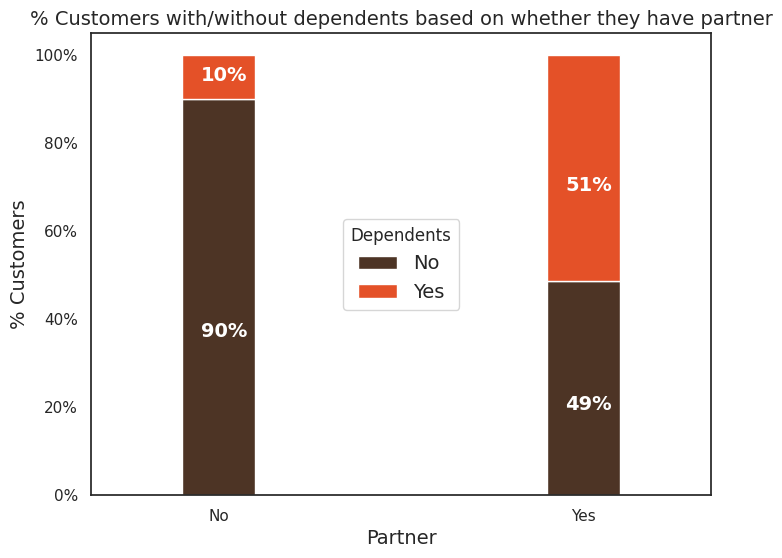

In [ ]:
color = ['#4D3425', '#E45128']
partner_dependents = telecom_cust.groupby(['Partner', 'Dependents']).size().unstack()

ax = (partner_dependents.T*100.0/partner_dependents.T.sum()).T.plot(kind='bar',
                                                                    width=0.2,
                                                                    stacked=True,
                                                                    rot=0,
                                                                    figsize = (8,6),
                                                                    color=colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center', prop={'size':14}, title = 'Dependents', fontsize = 14)
ax.set_ylabel('% Customers', size=14)
ax.set_title('% Customers with/without dependents based on whether they have partner', size=14)
ax.xaxis.label.set_size(14)

#Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x() + 0.25 * width, p.get_y() + 0.4 * height),
                color='white',
                weight='bold',
                size=14)

I also looked at any different between the % of customers with / without dependents and partners by gender. there is no different in their distribution by gender. Additionally, there is no different in senior citizen status by gender.

**B). Customer Account Information** - Let u now look at the tenure, contract

**1.Tenure:** After looking the below histogram we can see that a lof of customers have been with the telecom company for just a month, while quite a many are there for about 72 months. This colud be potentially because different customers have different contracts. Thus based on the contract they are into it could be more/less easier for the customers to stay / leave the telecom company.

<ipython-input-108-59ce6c6b0295>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(telecom_cust['tenure'], hist = True, kde = False,


Text(0.5, 1.0, '# of Customers by Their Tenure')

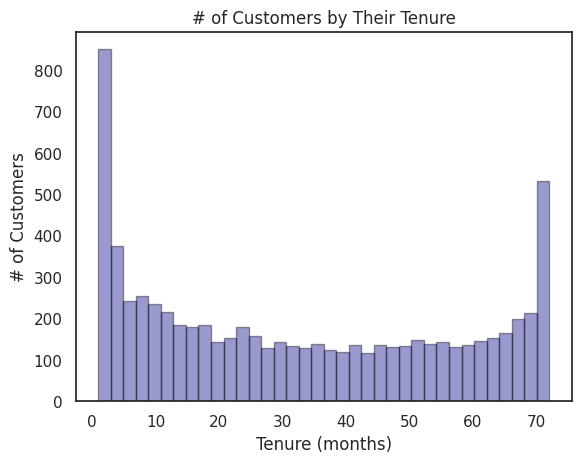

In [ ]:
ax = sns.distplot(telecom_cust['tenure'], hist = True, kde = False,
                  bins= int(180/5), color = 'darkblue',
                  hist_kws={'edgecolor':'black'},
                  kde_kws={'linewidth':4})
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('# of Customers by Their Tenure')

**2. Contracts:** To understand the above graph, lets first look at the # of customers by different contracts

Text(0.5, 1.0, '# of Customers by Contract Type')

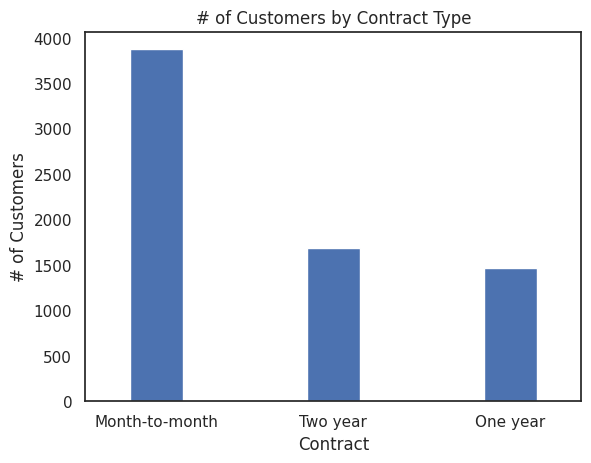

In [ ]:
ax = telecom_cust['Contract'].value_counts().plot(kind = 'bar', rot=0, width = 0.3)
ax.set_ylabel('# of Customers')
ax.set_title('# of Customers by Contract Type')

As we can see from this graph most of the customers are in the month contact. While there are equal number of customers in the 1

Below we will understand the tenure of customers based on their contract type

<ipython-input-110-fb852321b0e9>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(telecom_cust[telecom_cust['Contract'] == 'Month-to-month']['tenure'],
<ipython-input-110-fb852321b0e9>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(telecom_cust[telecom_cust['Contract'] == 'One year'

Text(0.5, 1.0, 'Two Year Contract')

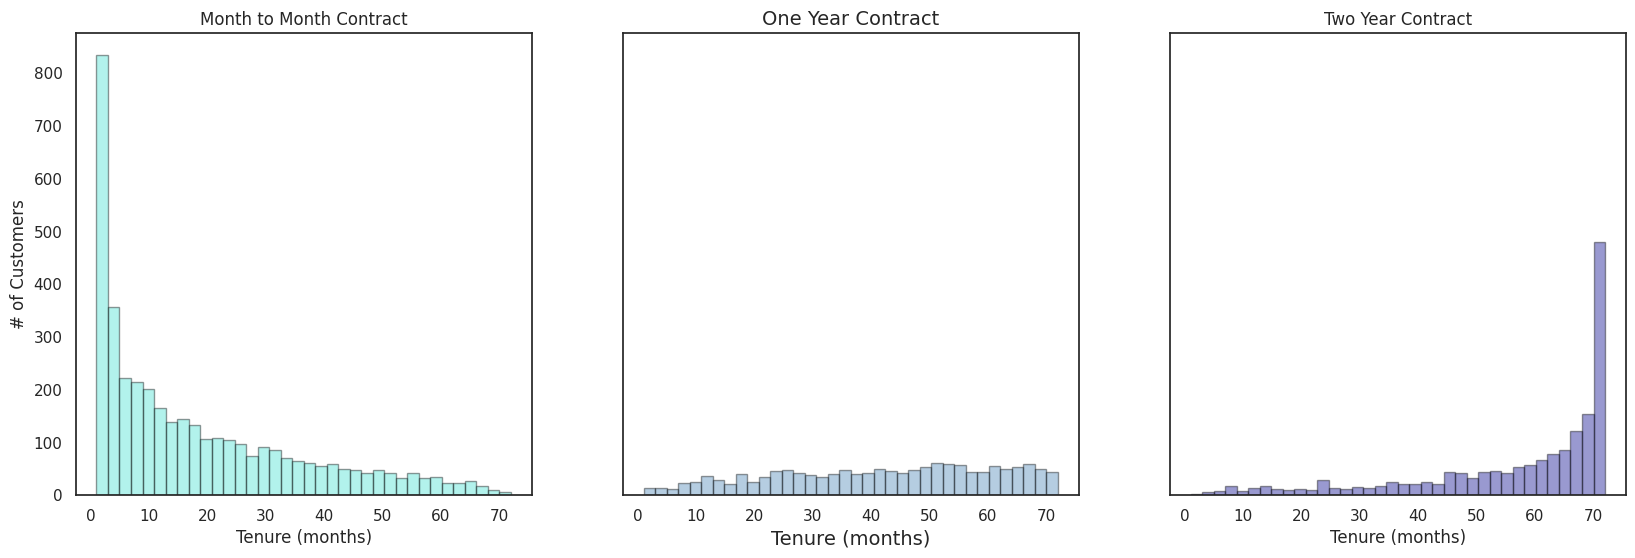

In [ ]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize=(20,6))

ax = sns.distplot(telecom_cust[telecom_cust['Contract'] == 'Month-to-month']['tenure'],
                 hist = True, kde = False,
                 bins= int(180/5), color = 'turquoise',
                 hist_kws={'edgecolor':'black'},
                 kde_kws={'linewidth': 4},
                 ax=ax1)
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Month to Month Contract')

ax = sns.distplot(telecom_cust[telecom_cust['Contract'] == 'One year']['tenure'],
                 hist = True, kde = False,
                 bins= int(180/5), color = 'steelblue',
                 hist_kws={'edgecolor':'black'},
                 kde_kws={'linewidth': 4},
                 ax=ax2)
ax.set_xlabel('Tenure (months)', size = 14)
ax.set_title('One Year Contract', size =14)

ax = sns.distplot(telecom_cust[telecom_cust['Contract'] == 'Two year']['tenure'],
                 hist = True, kde = False,
                 bins= int(180/5), color = 'darkblue',
                 hist_kws={'edgecolor':'black'},
                 kde_kws={'linewidth': 4},
                 ax=ax3)
ax.set_xlabel('Tenure (months)')
ax.set_title('Two Year Contract')

Interestingly most of the montly contracts last for 1-2 months, while the 2 year contracs tend to last for about 70 months. This show that the customers taking a longer contract are more loyal to the company and tend to stay with it for a longer period of time. This is also what we saw in the earlier chart on correlation with the churn rate.

**C. Let us now look at the distribution of various services used by customers**

In [ ]:
telecom_cust.columns. values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

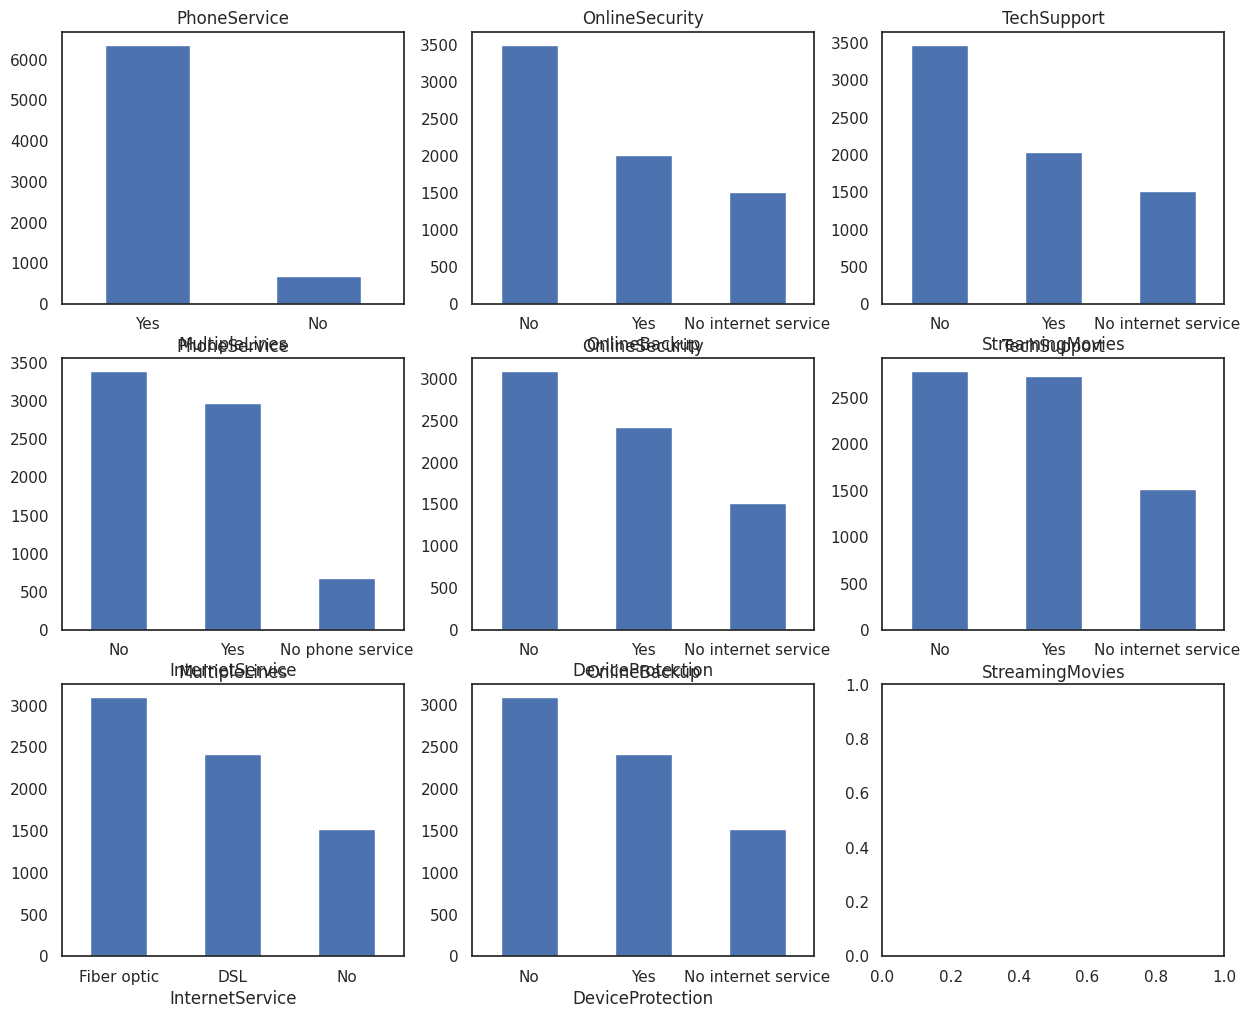

In [ ]:
services = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
            'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingMovies']

fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (15,12))
for i, item in enumerate(services):
    if i < 3:
        ax = telecom_cust[item].value_counts().plot(kind = 'bar', ax=axes[i,0], rot=0)
    elif i >=3 and i < 6:
        ax = telecom_cust[item].value_counts().plot(kind = 'bar', ax=axes[i-3,1], rot=0)
    elif i < 9:
        ax = telecom_cust[item].value_counts().plot(kind = 'bar', ax=axes[i-6,2], rot=0)
    ax.set_title(item)

**D.Now let's take a quick look at the relation between monthly and total charges**

We will observe that the total charges increases as the monthly bill for a customer increases

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

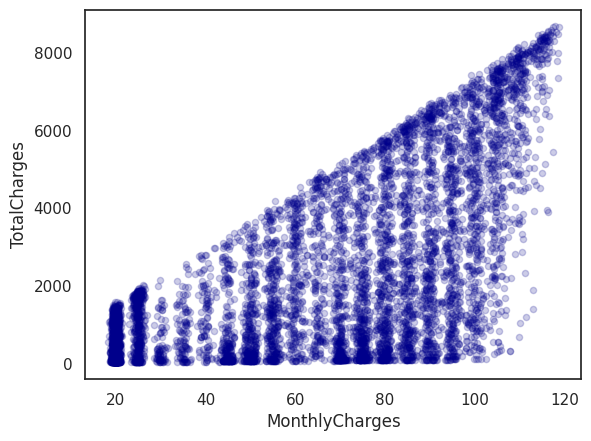

In [ ]:
telecom_cust[['MonthlyCharges', 'TotalCharges']].plot.scatter(x='MonthlyCharges',
                                                              y='TotalCharges', alpha=0.2, color='darkblue')

**E. Finally, let's take a look at out predictor variable(Churn) and understand its interaction with other important variables as was found out in the correlation plot.**

1. Let's first look at the churn rate in our data

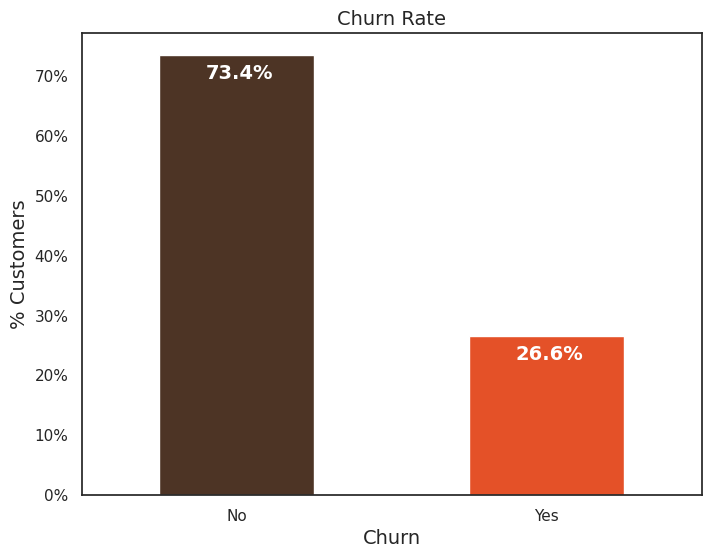

In [ ]:
colors =['#4D3425', '#E45128']
ax = (telecom_cust['Churn'].value_counts()*100.0/len(telecom_cust)).plot(kind = 'bar',
                                                  stacked=True,
                                                  rot=0,
                                               color=colors,
                                                          figsize=(8,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers', size=14)
ax.set_xlabel('Churn', size=14)
ax.set_title('Churn Rate', size=14)

#Create a list to collect the plt.patches data
totals=[]

#Find the values and append to list
for i in ax.patches:
  totals.append(i.get_width())

#Set individual bar labels using above list
total = sum(totals)

for i in ax.patches:
  #Get_width pulls left or right; get_y pushes up or down
  ax.text(i.get_x()+.15, i.get_height() - 4.0,
          str(round((i.get_height()/total), 1))+'%',
          color='white',
          weight='bold',
          fontsize=14) #Changed 'size' to 'fontsize'

plt.show()

In our data, 74% of the customers do not churn. Clearly the data is skewed as we would expect a large majority of the customers to no churn. This isi important to keep in mind for our modelling as skewness could lead to a lot of false negatives. We will see in the modelling section on how to avoid skewness in the data.

2. Let's now explore the churn rate by tenure, seniority, contract type, monthly charges and total charges to see how it varies by these variebles.

**i.)Churn vs Tenure:** As we can see form the below plot, the customers who do not churn they tend to stay for a longer tenure with the telecom company.

<Axes: xlabel='Churn', ylabel='tenure'>

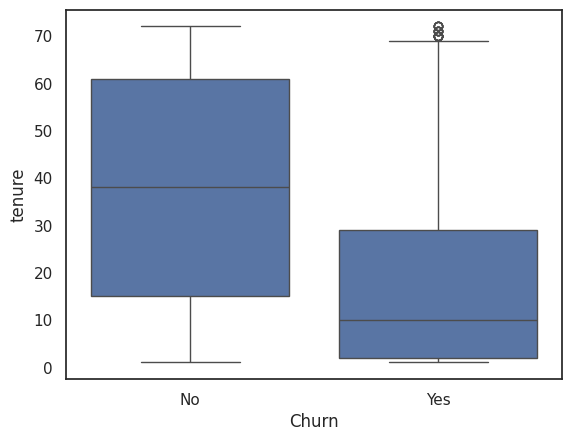

In [ ]:
sns.boxplot(x = telecom_cust.Churn, y = telecom_cust.tenure)

**ii). Churn by Contract Type:** Similar to what we saw in the correlation plot the customers who have a month to month contract have a very high churn rate.

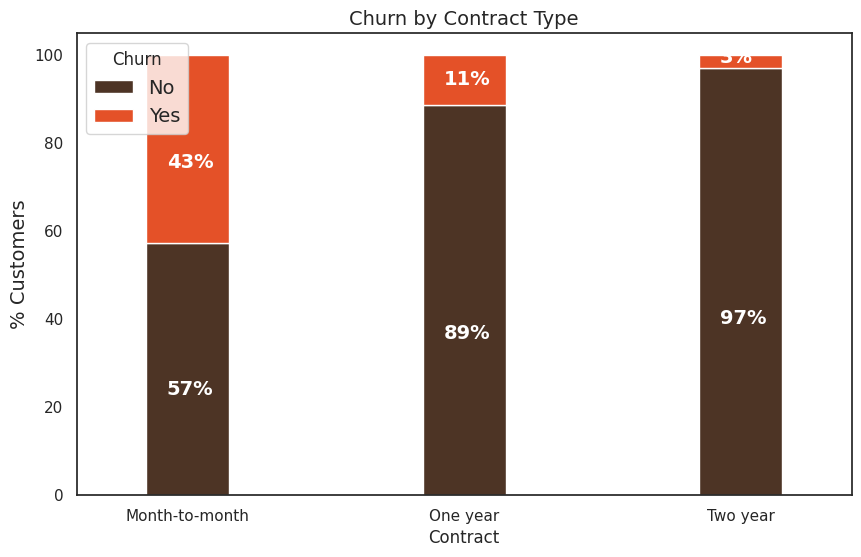

In [ ]:
colors = ['#4D3425', '#E45128']
contract_churn = telecom_cust.groupby(['Contract', 'Churn']).size().unstack()


ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                              width = 0.3,
                                                              stacked = True,
                                                              rot = 0,
                                                              figsize =(10,6),
                                                              color = colors)
# Menambahkan legenda dan label
ax.legend(loc='best', prop={'size': 14}, title='Churn')
ax.set_ylabel('% Customers', size=14)
ax.set_title('Churn by Contract Type', size=14)

# Menambahkan data label pada grafik batang bertumpuk
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x() + 0.25 * width, p.get_y() + 0.4 * height),
                color='white',
                weight='bold',
                size=14)

# Menampilkan plot
plt.show()

**iii). Churn by Senior:** Senior citizen have almost double the churn rate than youger population

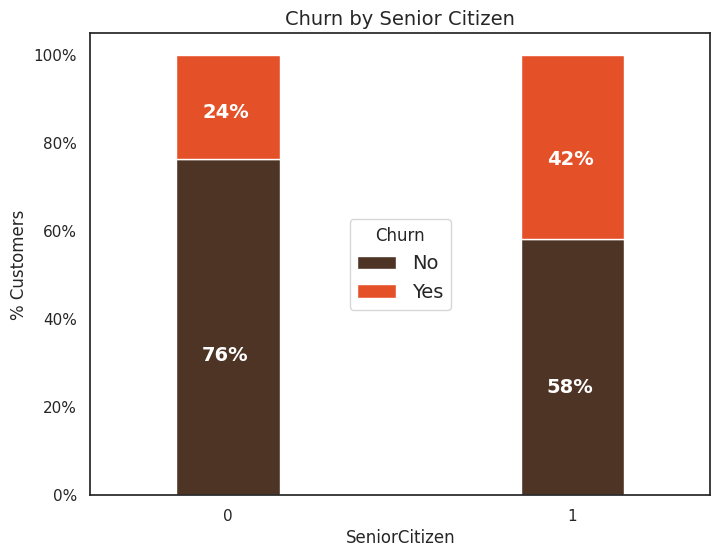

In [ ]:
colors = ['#4D3425', '#E45128']
seniority_churn = telecom_cust.groupby(['SeniorCitizen', 'Churn']).size().unstack()

ax = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(kind='bar',
                                                              width = 0.3,
                                                                stacked=True,
                                                                rot = 0,
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center', prop={'size': 14}, title='Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn by Senior Citizen', size=14)

#Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x() + 0.25 * width, p.get_y() + 0.4 * height),
                color='white',
                weight='bold',
                size=14)

# Menampilkan plot
plt.show()

**iv). Churn by Mothly Charges:** Higher % of customers churn when the monthly charges are high.

<ipython-input-118-f66fd0b84194>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(telecom_cust.MonthlyCharges[(telecom_cust["Churn"] == 'No') ],
<ipython-input-118-f66fd0b84194>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(telecom_cust.MonthlyCharges[(telecom_cust["Churn"] == 'Yes') ],


Text(0.5, 1.0, 'Monthly charges by churn')

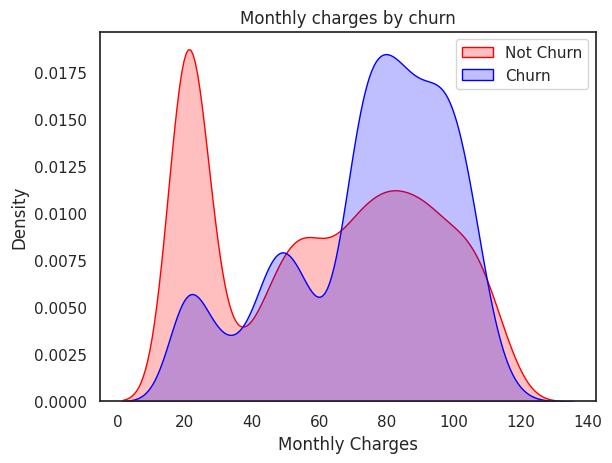

In [ ]:
ax = sns.kdeplot(telecom_cust.MonthlyCharges[(telecom_cust["Churn"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(telecom_cust.MonthlyCharges[(telecom_cust["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Monthly charges by churn')

**v). Churn by Total Charges:** It seems that there is higer churn when the total charges are lower.

<ipython-input-119-eb72ed2282b5>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(telecom_cust.TotalCharges[(telecom_cust["Churn"] == 'No') ],
<ipython-input-119-eb72ed2282b5>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(telecom_cust.TotalCharges[(telecom_cust["Churn"] == 'Yes') ],


Text(0.5, 1.0, 'Total charges by churn')

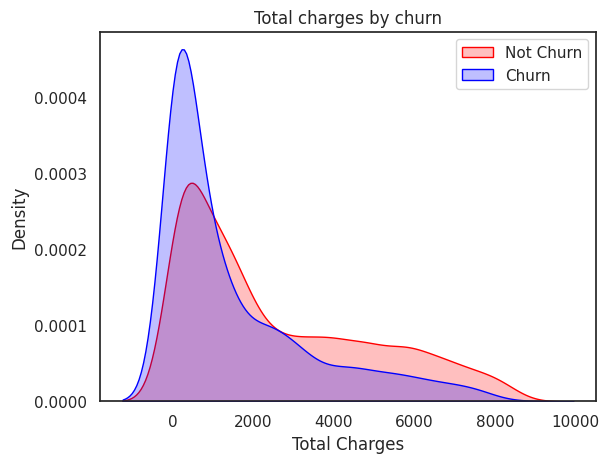

In [ ]:
ax = sns.kdeplot(telecom_cust.TotalCharges[(telecom_cust["Churn"] == 'No') ],
                 color="Red", shade = True)
ax = sns.kdeplot(telecom_cust.TotalCharges[(telecom_cust["Churn"] == 'Yes') ],
                 ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Total charges by churn')

**After going through the above EDA we will develop some predictive models and compare them**

We will develope Logistic Regression, KNN, Random Forest, XGBoost

**1. Logistic Regression**

In [ ]:
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


In [ ]:
#We will use the data frame where we had crated dumy variables
y = df_dummies['Churn'].values
x = df_dummies.drop(columns = ['Churn'])

In [ ]:
y

array([0, 0, 1, ..., 0, 1, 0])

Chi Square test fo Classification feature selction

In [ ]:
from sklearn.feature_selection import chi2

In [ ]:
chi_scores = chi2(x,y)

In [ ]:
len(x.columns)

30

In [ ]:
p_values = pd.Series(chi_scores[1], index = x.columns)
p_values.sort_values(ascending = True, inplace = True)

*Look at the f_values series and see the top f score for the feature selection*

In [ ]:
f_values = pd.Series(chi_scores[0], index = x.columns)
f_values.sort_values(ascending = False, inplace = True)

In [ ]:
f_values[:30]

,0
TotalCharges,629630.810349
tenure,16377.328093
MonthlyCharges,3653.074681
Contract_Two year,486.223101
PaymentMethod_Electronic check,424.113152
InternetService_Fiber optic,372.082851
InternetService_No,285.475152
TechSupport_No internet service,285.475152
DeviceProtection_No internet service,285.475152
OnlineBackup_No internet service,285.475152


We know from this the Feature - Total charges with highest F score was most significant in the customer churn

<Axes: >

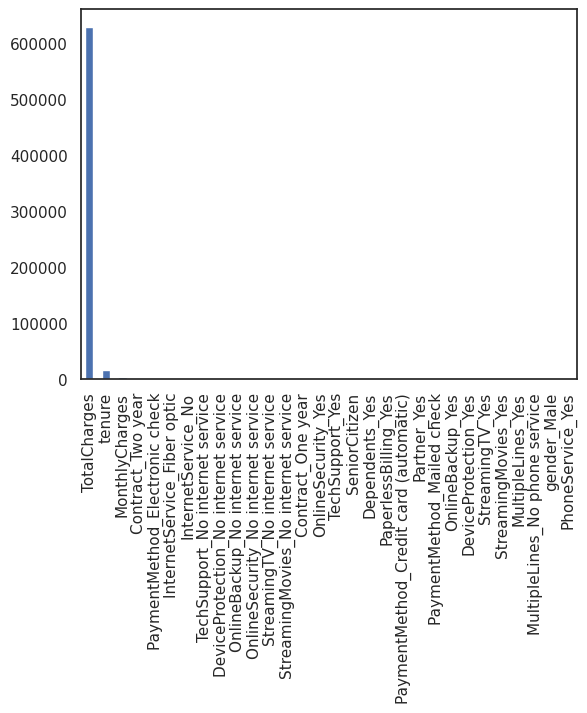

In [ ]:
f_values.plot.bar()

In feature selection, we aim to select the features which are highly dependent on the response. When two features are independent, the observed count is close to the expected count, thus we will have smaller Chi-Square value. In the above graph, the high Chi-Square value indicates that the hypothesis of independence is incorrect. In simple words, higher the Chi Square value the feature is more dependent on the response and it can be selected for model training.

In [ ]:
#Scalling all the variables to a range of 0 to 1
#from sklearn.preprocessing import MinMaxScaler
#features = X.columns.values
#Scaler = MinMaxScaler(feature_range = (0.1))
#Scaler.fit(x)
#x = pd.DataFrame(scaler.transform(x))
#x.columns = feature

In [ ]:
from sklearn.preprocessing import StandardScaler
features = x.columns.values
scaler = StandardScaler()
scaler.fit(x)
x = pd.DataFrame(scaler.transform(x))

In [ ]:
x

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-0.440327,-1.280248,-1.161694,-0.994194,-1.009430,1.035617,-0.652305,-3.056334,3.056334,-0.854336,...,-0.52513,-0.790186,-0.52513,-0.796849,-0.514537,-0.561364,0.828939,-0.525351,1.404764,-0.543604
1,-0.440327,0.064303,-0.260878,-0.173740,0.990658,-0.965608,-0.652305,0.327189,-0.327189,-0.854336,...,-0.52513,-0.790186,-0.52513,-0.796849,1.943495,-0.561364,-1.206361,-0.525351,-0.711863,1.839576
2,-0.440327,-1.239504,-0.363923,-0.959649,0.990658,-0.965608,-0.652305,0.327189,-0.327189,-0.854336,...,-0.52513,-0.790186,-0.52513,-0.796849,-0.514537,-0.561364,0.828939,-0.525351,-0.711863,1.839576
3,-0.440327,0.512486,-0.747850,-0.195248,0.990658,-0.965608,-0.652305,-3.056334,3.056334,-0.854336,...,-0.52513,-0.790186,-0.52513,-0.796849,1.943495,-0.561364,-1.206361,-0.525351,-0.711863,-0.543604
4,-0.440327,-1.239504,0.196178,-0.940457,-1.009430,-0.965608,-0.652305,0.327189,-0.327189,-0.854336,...,-0.52513,-0.790186,-0.52513,-0.796849,-0.514537,-0.561364,0.828939,-0.525351,1.404764,-0.543604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,-0.440327,-0.343137,0.664868,-0.129180,0.990658,1.035617,1.533025,0.327189,-0.327189,1.170500,...,-0.52513,1.265525,-0.52513,1.254943,1.943495,-0.561364,0.828939,-0.525351,-0.711863,1.839576
7028,-0.440327,1.612573,1.276493,2.241056,-1.009430,1.035617,1.533025,0.327189,-0.327189,1.170500,...,-0.52513,1.265525,-0.52513,1.254943,1.943495,-0.561364,0.828939,1.903490,-0.711863,-0.543604
7029,-0.440327,-0.872808,-1.170004,-0.854514,-1.009430,1.035617,1.533025,-3.056334,3.056334,-0.854336,...,-0.52513,-0.790186,-0.52513,-0.796849,-0.514537,-0.561364,0.828939,-0.525351,1.404764,-0.543604
7030,2.271039,-1.158016,0.319168,-0.872095,0.990658,1.035617,-0.652305,0.327189,-0.327189,1.170500,...,-0.52513,-0.790186,-0.52513,-0.796849,-0.514537,-0.561364,0.828939,-0.525351,-0.711863,1.839576


It is important to scale the variables in logistic regression so that all of them are within a range of 0 to 1. This helped me improve the accuracy from 79.7% to 80.7%. Further, you will notice below that the importance of variables is also aligned with what we are seeing in Random Forest algorithm and the EDA we conducted above.

In [ ]:
#Create Train and Test Data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=101)

In [ ]:
#Running logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logmodel = LogisticRegression()
logmodel.fit(x_train, y_train)

LogisticRegression()

Logistic Regression Accuracy: 0.8066350710900474


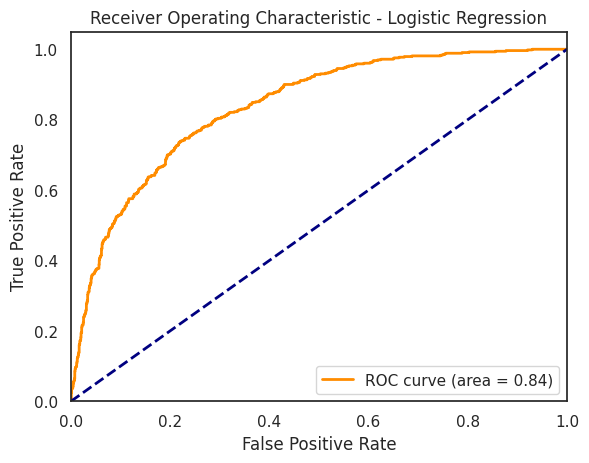

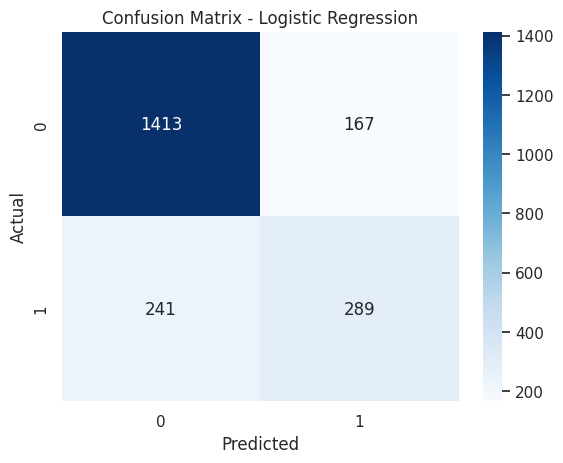

Logistic Regression Precision: 0.6337719298245614
Logistic Regression Recall: 0.5452830188679245
Logistic Regression F1-Score: 0.5862068965517241


In [ ]:
prediction_test_lr = logmodel.predict(x_test)
probs_lr = logmodel.predict_proba(x_test)[:, 1]

# Print the prediction accuracy
print("Logistic Regression Accuracy:", metrics.accuracy_score(y_test, prediction_test_lr))

# ROC-AUC
fpr_lr, tpr_lr, thresholds_lr = metrics.roc_curve(y_test, probs_lr)  # Perbaikan: tambahkan thresholds_lr
roc_auc_lr = metrics.roc_auc_score(y_test, probs_lr)

plt.figure()
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_lr)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Logistic Regression')
plt.legend(loc="lower right")
plt.show()

# Confusion Matrix
conf_matrix_lr = metrics.confusion_matrix(y_test, prediction_test_lr)
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# Precision, Recall, F1-Score
precison_lr = metrics.precision_score(y_test, prediction_test_lr)
recall_lr = metrics.recall_score(y_test, prediction_test_lr)
f1_lr = metrics.f1_score(y_test, prediction_test_lr)

print("Logistic Regression Precision:", precison_lr)
print("Logistic Regression Recall:", recall_lr)
print("Logistic Regression F1-Score:", f1_lr)

Akurasi = jumlah observasi yang diprediksi dengan benar / total semua observasi.
Eror = 1-Akurasi.
However, accuracy alone is not enough, especially in data where positive observation are very rare.



**AUC and ROC**

*   the best classification has the largest area under the curve
*   too sensitive to errors in the "Gold standard classification"



**Interpretation**


*   ROC Curve Area(AUC) ROC Curve: The Receiver Operating (ROC) curve plots the true positive rate (recall) against the false positive rate.
*   AUC (Area Under the Curve): The AUC value of 0.84 indicates a good performance. A value of 1.0 represents a perfect model. While 0.5 suggests no discriminatory power (equivalent to random guessing). Hence, 0.84 shows that the model has a strong ability to distinguish between churned and non-churned customers.


*   Precision is the ratio of correctly predicted positives. It focuses on the accuracy of the positive predictions. Value (0.636): This indicates that approximately 63.6% of the customers predicted to churn actually did churn. This is relatively high, meaning taht the model is fairly rellable in identifiying true churners among the predicted positives.
*   Recall Recall (Sensivity): Recall is the ratio of correctly predicted positive observations to all observation in the actual class. Value (0.534): This indicated that the model correctly identifies approximately 53.4% of the actual churners. This is somewhat moderate, suggesting that the model misses a fair number of true churners.


*   F1-Score : The F1-score is the harmonic mean of precision and recall. It provides a single metric that balances both precision and recall. F-1 score. Value (0.581): This indicates a moderate balance between precision and recall. The F1-score is useful when you need to balance both concerns and gives you a single performance metrics. Practical Implications.
*   High Precision but Lower Recall: Your model is good at predicting true churners when it does predict a churn, but it misses quite a few actual churners. This is often a trade-off where the model is conservative in making positive predictions to avoid false positive but ends up with more false negative. ROC-AUC of 0.84: Overall, your model discriminates well between churned and non-churnerd customers. However, it might need turning to improve recall if capturing all churned customers is critical for your business.







Axes(0.125,0.11;0.775x0.77)


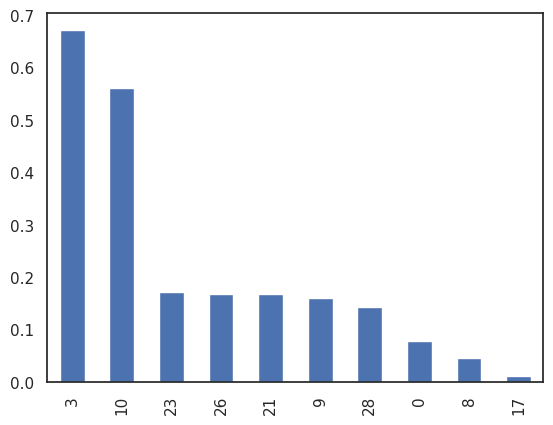

In [ ]:
# Pastikan Anda telah melatih model dan menyimpannya dalam variabel 'model'
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x, y)

# To get the weight of all the variables
weights = pd.Series(model.coef_[0],
                   index = x.columns.values)
print (weights.sort_values(ascending = False)[:10].plot(kind='bar'))

Axes(0.125,0.11;0.775x0.77)


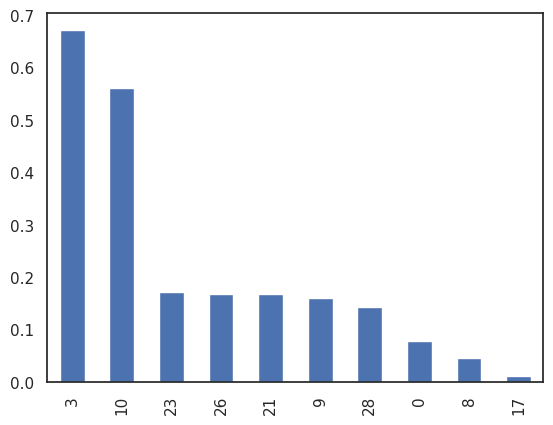

In [ ]:
#To get the weight of all the variables
weights = pd.Series(model.coef_[0],
                   index = x.columns.values)
print (weights.sort_values(ascending = False)[:10].plot(kind='bar'))

Axes(0.125,0.11;0.775x0.77)


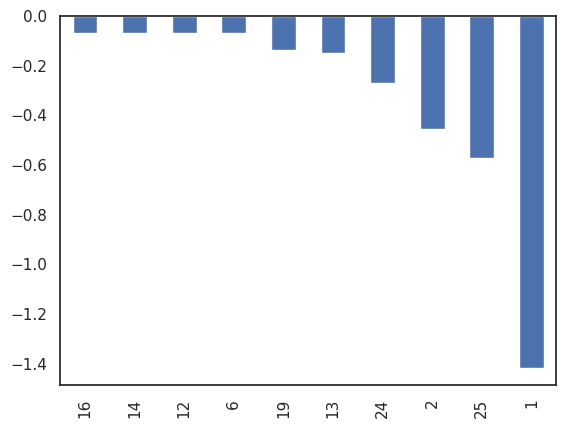

In [ ]:
print (weights.sort_values(ascending = False)[-10:].plot(kind='bar'))

In [ ]:
pd.DataFrame(zip(x_train.columns, np.exp(np.transpose(model.coef_))), columns=['features', 'coef'])

,features,coef
0,0,[1.0830346983830825]
1,1,[0.2422295153169572]
2,2,[0.6333901352594938]
3,3,[1.957311729261982]
4,4,[0.9886803803482692]
5,5,[0.999581436981826]
6,6,[0.9335886677703573]
7,7,[0.9542056024903761]
8,8,[1.0479921700209107]
9,9,[1.1744911801202265]


**Observations**
We can see that some variables have a negative relation to our predicted variable (churn), while some have positive relation. Negative relation means that likeliness of churn decreases with taht variable. Let's us summarize of the interesting features below:


*   As we saw in our EDA, having a two month contract reduces chances of churn. 2 month contract along with tenure have the most negative relation with Churn as predicted by logistic regressions.
*   Having DSL internet service also reduces the probability of Churn


*   Lastly, total charges, monthly contracts, fibre optic internet services and seniority can lead to higher churn rates. This is interesting because although fibre optic service are faster, customers are likely to churn because of it. I think we need to explore more to better understand why this is happening.
Any hypothesis on the above would be really helpfull





**2. KNN**

KNN Accuracy: 0.7568720379146919


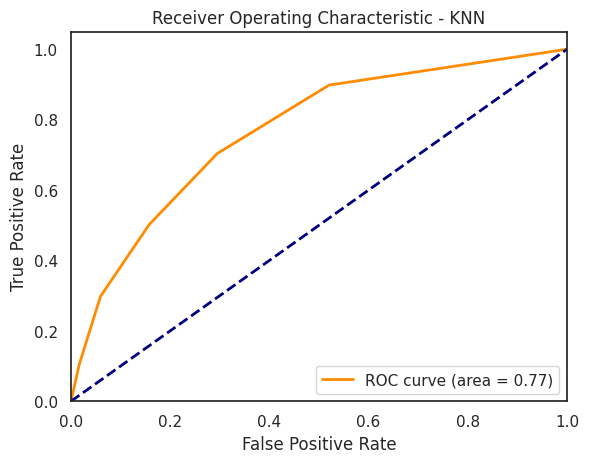

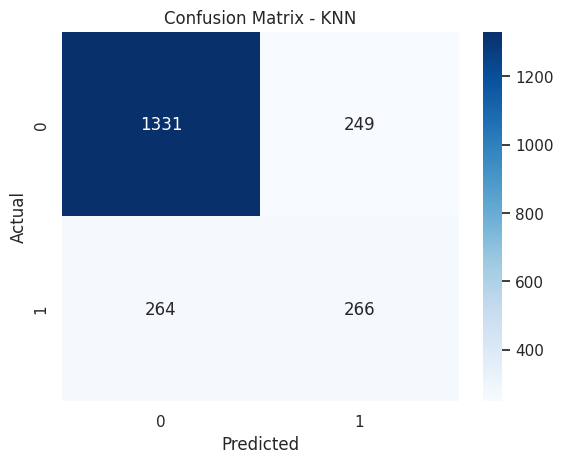

KNN Precision: 0.516504854368932
KNN Recall: 0.5018867924528302
KNN F1-Score: 0.509090909090909


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(x_train, y_train)

#make prediction with KNN
prediction_test_knn = model_knn.predict(x_test)
probs_knn = model_knn.predict_proba(x_test)[:, 1]

# Print the prediction accuracy
print("KNN Accuracy:", metrics.accuracy_score(y_test, prediction_test_knn))

# ROC-AUC
fpr_knn, tpr_knn, _ = metrics.roc_curve(y_test, probs_knn)
roc_auc_knn = metrics.roc_auc_score(y_test, probs_knn)

plt.figure()
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - KNN')
plt.legend(loc="lower right")

plt.show()
# Confusion Matrix
conf_matrix_knn = metrics.confusion_matrix(y_test, prediction_test_knn)
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - KNN')
plt.show()

#Precision Recall, F1-Score
precision_knn = metrics.precision_score(y_test, prediction_test_knn)
recall_knn = metrics.recall_score(y_test, prediction_test_knn)
f1_knn = metrics.f1_score(y_test, prediction_test_knn)

print("KNN Precision:", precision_knn)
print("KNN Recall:", recall_knn)
print("KNN F1-Score:", f1_knn)

**3.Random Forest**

Random Forest Accuracy: 0.8075829383886256


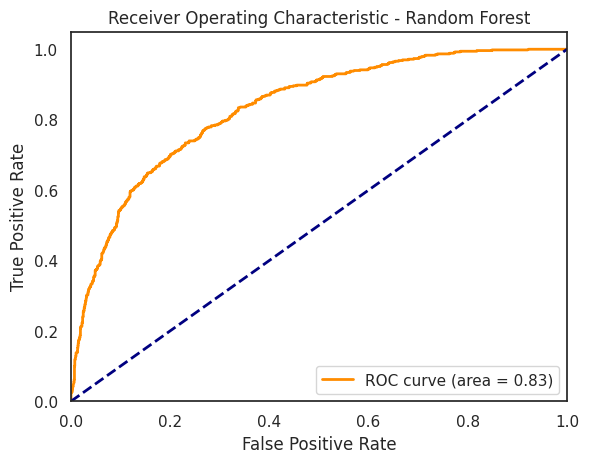

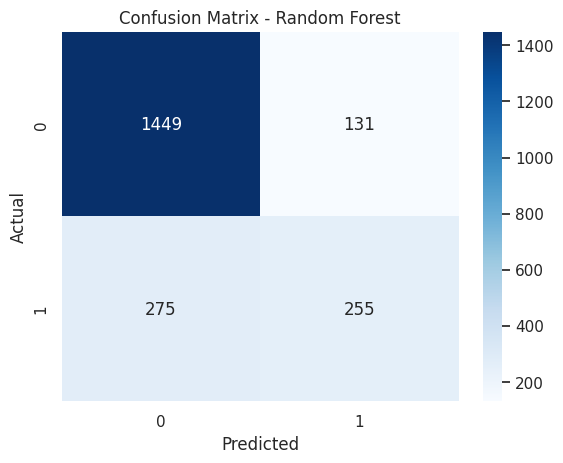

Random Forest Precision: 0.6606217616580311
Random Forest Recall: 0.4811320754716981
Random Forest F1-Score: 0.5567685589519651


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=100, oob_score=True, n_jobs=-1,
                                  random_state=50, max_features='sqrt',  # Ganti 'auto' dengan 'sqrt'
                                  max_leaf_nodes=30)
model_rf.fit(x_train, y_train)

# Make prediction with Random Forest
prediction_test_rf = model_rf.predict(x_test)  # Perbaiki: gunakan .predict() bukan .prediction()
probs_rf = model_rf.predict_proba(x_test)[:, 1]

# Print the prediction accuracy
print("Random Forest Accuracy:", metrics.accuracy_score(y_test, prediction_test_rf))

# ROC_AUC
fpr_rf, tpr_rf, _ = metrics.roc_curve(y_test, probs_rf)
roc_auc_rf = metrics.roc_auc_score(y_test, probs_rf)

plt.figure()
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Random Forest')
plt.legend(loc="lower right")
plt.show()

# Confusion matrix
conf_matrix_rf = metrics.confusion_matrix(y_test, prediction_test_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

# Precision, Recall, F1-Score
precision_rf = metrics.precision_score(y_test, prediction_test_rf)
recall_rf = metrics.recall_score(y_test, prediction_test_rf)
f1_rf = metrics.f1_score(y_test, prediction_test_rf)

print("Random Forest Precision:", precision_rf)
print("Random Forest Recall:", recall_rf)
print("Random Forest F1-Score:", f1_rf)

<Axes: >

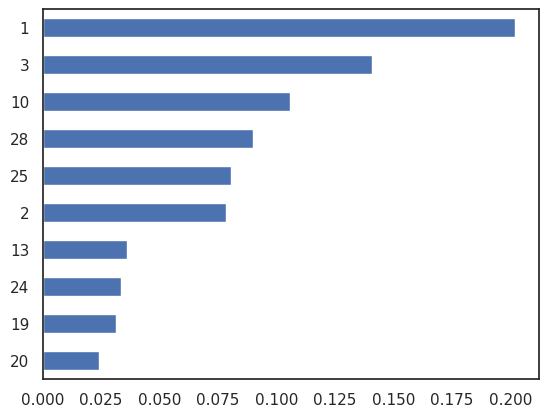

In [ ]:
importances = model_rf.feature_importances_
weights = pd.Series(importances,
                   index=x.columns.values)
weights.sort_values()[-10:].plot(kind='barh')

**Observations:**


*   From random forest algorithm, monthly contract, tenure and total charges are the most important predictor variables to predict churn
*   The results from random forest are very similar to that to the logistic regression and in the line to what we had expected from our EDA



**4.XG Boost**

XG Boost Accuracy: 0.8118483412322275


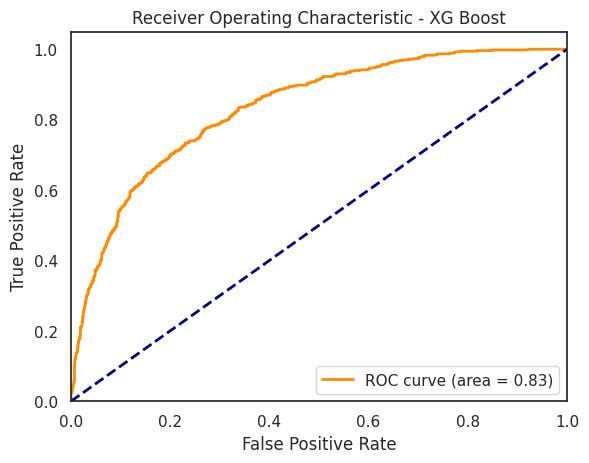

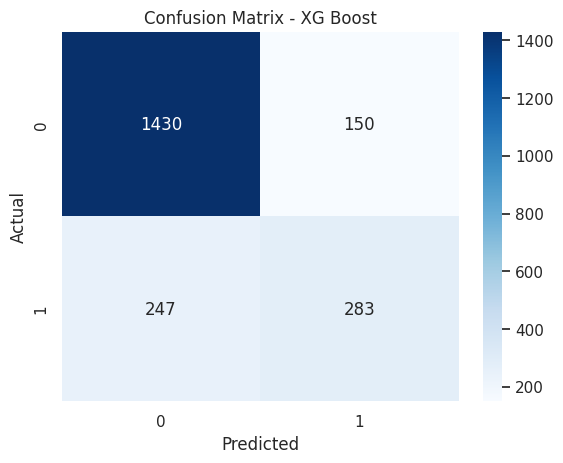

XG Boost Precision: 0.6535796766743649
XG Boost Recall: 0.5339622641509434
XG Boost F1-Score: 0.5877466251298027


In [ ]:
from xgboost import XGBClassifier
model_xgb = XGBClassifier()
model_xgb.fit(x_train, y_train)

# Make prediction with XGBoost
prediction_test_rf = model.predict (x_test)
probs_xgb = model.predict_proba(x_test)[:, 1]

# Print the prediction accuracy
print("XG Boost Accuracy:", metrics.accuracy_score(y_test, prediction_test_rf))

# ROC_AUC
fpr_xgb, tpr_xgb, _ = metrics.roc_curve(y_test, probs_rf)
roc_auc_rf = metrics.roc_auc_score(y_test, probs_rf)

plt.figure()
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - XG Boost')
plt.legend(loc="lower right")
plt.show()

# Confusion matrix
conf_matrix_rf = metrics.confusion_matrix(y_test, prediction_test_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - XG Boost')
plt.show()

# Precision, Recall, F1-Score
precision_rf = metrics.precision_score(y_test, prediction_test_rf)
recall_rf = metrics.recall_score(y_test, prediction_test_rf)
f1_rf = metrics.f1_score(y_test, prediction_test_rf)

print("XG Boost Precision:", precision_rf)
print("XG Boost Recall:", recall_rf)
print("XG Boost F1-Score:", f1_rf)

Interestingly with XG Boost I was able to increase the accuracy on test data to almost 83%. Clearly, XG Boost is a winner among all other techniques. XG Boost is a slow learning model and is based on the concept of Boosting

**Hyperparameter Tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import warnings
import numpy as np

warnings.filterwarnings('ignore')

# List Hyperparameters yang akan diuji
penalty = ['l1', 'l2']  # Ganti '11' dan '12' dengan 'l1' dan 'l2'
C = [-4,4,20]  # Ganti nilai C dengan nilai yang lebih umum
# Menjadikan ke dalam bentuk dictionary
Hyperparameters = dict(penalty=penalty, C=C)

# Membuat Object Logistic Regression
logreg = LogisticRegression()  # Pastikan solver mendukung penalty yang dipilih

# Memasukkan ke Grid Search
clf = GridSearchCV(logreg, Hyperparameters, cv=5)  # Menambahkan parameter cv untuk cross-validation

# Fitting hyperparameters terbaik
clf.fit(x_train, y_train)  # Melatih model dengan data pelatihan

# Mengakses model terbaik
print('Best Penalty:', clf.best_estimator_.get_params()['penalty'])
print('Best C:', clf.best_estimator_.get_params()['C'])

# Prediksi menggunakan model baru
y_pred = clf.predict(x_test)  # Menggunakan clf untuk prediksi

# Evaluasi akurasi model baru
print(metrics.classification_report(y_test, y_pred))

Best Penalty: l2
Best C: 20
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1580
           1       0.64      0.55      0.59       530

    accuracy                           0.81      2110
   macro avg       0.75      0.72      0.73      2110
weighted avg       0.80      0.81      0.80      2110



In [ ]:
clf = LogisticRegression(C=20, penalty='l2')
clf.fit(x_train, y_train)

LogisticRegression(C=20)

In [ ]:
pd.DataFrame(zip(x_train.columns, np.exp(np.transpose(clf.coef_))), columns=['features', 'coef'])

,features,coef
0,0,[1.107267079485095]
1,1,[0.2580541010995342]
2,2,[0.17020611669137092]
3,3,[1.8349312627431456]
4,4,[0.9887972697764511]
5,5,[0.9900887647005393]
6,6,[0.9483557059487709]
7,7,[1.0945153266059338]
8,8,[0.9136464110566344]
9,9,[1.2753485407072471]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import warnings

warnings.filterwarnings('ignore')

# List Hyperparameters yang akan diuji
parameters = {
    "criterion": ["gini", "entropy", "log_loss"],
    "max_depth": [1, 2, 3, 4, 5],
    "max_features": ["auto", "sqrt", None],
    "n_estimators": [30, 50, 100],
    "min_samples_leaf": [10]  # Perbaiki ejaan dari 'min_sampels_leaf' menjadi 'min_samples_leaf'
    }

# Membuat Object Random Forest
model_rf = RandomForestClassifier()

# Memasukkan ke Grid Search
# CV itu Cross Validation
# menggunakan 5-fold CV
clf = GridSearchCV(model_rf, parameters, cv=5)

# Fitting hyperparameters terbaik
best_model = clf.fit(x_train, y_train)

# Nilai Hyperparameters terbaik
print('Best Parameters:', best_model.best_params_)

# Prediksi menggunakan model baru
y_pred = best_model.predict(x_test)

# Evaluasi akurasi model baru
print(metrics.classification_report(y_test, y_pred))

Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'n_estimators': 50}
              precision    recall  f1-score   support

           0       0.82      0.93      0.87      1580
           1       0.65      0.41      0.50       530

    accuracy                           0.80      2110
   macro avg       0.74      0.67      0.69      2110
weighted avg       0.78      0.80      0.78      2110

